# 5.7.1 Users' Domain Knowledge
contains information about users' domain knowledge. There are five variables that you can think of as attributes of a user and one categorical variable that you can think of as a class label for that user. As a reference, the original study details are in the following paper. (not required to complete this lab)
H. T. Kahraman, Sagiroglu, S., Colak, I. (2013). Developing intuitive knowledge classifier and modeling of users' domain dependent data. Knowledge-Based Systems, vol. 37, pp. 283–295.

Step 1: Ignore the class label variable and focus on the five attributes. Using these attributes, cluster the users with two different methods of clustering.

Step 2: Provide your observations and comparisons.

Step 3: Now assuming that you can use these clusters for labeling the data points, report your classification accuracy concerning the truth data available in that last column.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV

In [8]:
df_train = pd.read_excel('Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls', sheet_name='Training_Data', engine='xlrd')
df_test = pd.read_excel('Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls', sheet_name='Test_Data', engine='xlrd')
print(df_train.columns)
print(df_test.columns)
display(df_train)

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS', 'Unnamed: 6', 'Unnamed: 7',
       'Attribute Information:'],
      dtype='object')
Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS', 'Unnamed: 6', 'Unnamed: 7',
       'Attribute Information:'],
      dtype='object')


,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
0,0.00,0.00,0.00,0.00,0.00,very_low,NaN,NaN,STG (The degree of study time for goal object ...
1,0.08,0.08,0.10,0.24,0.90,High,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.06,0.06,0.05,0.25,0.33,Low,NaN,NaN,STR (The degree of study time of user for rela...
3,0.10,0.10,0.15,0.65,0.30,Middle,NaN,NaN,LPR (The exam performance of user for related ...
4,0.08,0.08,0.08,0.98,0.24,Low,NaN,NaN,PEG (The exam performance of user for goal obj...
...,...,...,...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High,NaN,NaN,NaN
254,0.78,0.61,0.71,0.19,0.60,Middle,NaN,NaN,NaN
255,0.54,0.82,0.71,0.29,0.77,High,NaN,NaN,NaN
256,0.50,0.75,0.81,0.61,0.26,Middle,NaN,NaN,NaN


In [9]:
df_train = df_train.drop(['Unnamed: 6', 'Unnamed: 7', 'Attribute Information:'], axis=1)
df_test = df_test.drop(['Unnamed: 6', 'Unnamed: 7', 'Attribute Information:'], axis=1)
display(df_test)
df_train

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,High
141,0.85,0.82,0.66,0.83,0.83,High
142,0.56,0.60,0.77,0.13,0.32,Low
143,0.66,0.68,0.81,0.57,0.57,Middle


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


Inertia (SSE) for KMeans: 41.12331096472882
Silhouette Score for KMeans: 0.2041377912087986
[[0.37131169 0.41509091 0.66727273 0.26324675 0.61679221]
 [0.6415     0.4345     0.49678571 0.79428571 0.65285714]
 [0.30747253 0.32064835 0.45615385 0.59043956 0.19956044]
 [0.34230645 0.29769355 0.22491935 0.2483871  0.55435484]]
[3 3 3 2 2 3 3 2 2 3 0 2 2 0 0 0 2 3 3 3 2 3 3 2 2 0 2 2 2 0 0 2 2 3 3 3 2
 3 2 2 2 0 0 2 2 0 0 0 0 3 3 3 2 0 0 2 2 0 0 2 2 0 0 2 2 3 3 3 3 3 3 3 2 0
 0 2 2 0 2 2 2 3 3 2 2 2 3 2 2 0 0 2 2 0 0 2 2 3 3 3 2 3 3 2 2 0 0 0 2 0 0
 0 1 3 3 2 2 1 0 0 2 2 0 0 0 1 0 0 2 2 3 3 2 1 3 3 2 2 0 2 2 2 0 0 0 1 3 2
 2 1 3 3 2 2 0 0 0 1 0 0 2 2 3 3 2 3 3 0 2 3 0 0 0 2 0 0 2 1 3 3 2 1 0 2 2
 2 0 0 2 1 0 0 0 1 3 3 2 2 3 2 2 1 2 2 1 2 0 0 2 1 3 3 1 1 0 3 2 1 0 0 2 1
 0 0 2 1 3 3 1 1 3 3 2 1 0 0 2 0 0 0 2 1 3 3 2 1 0 3 1 1 0 0 2 1 0 0 2 1]


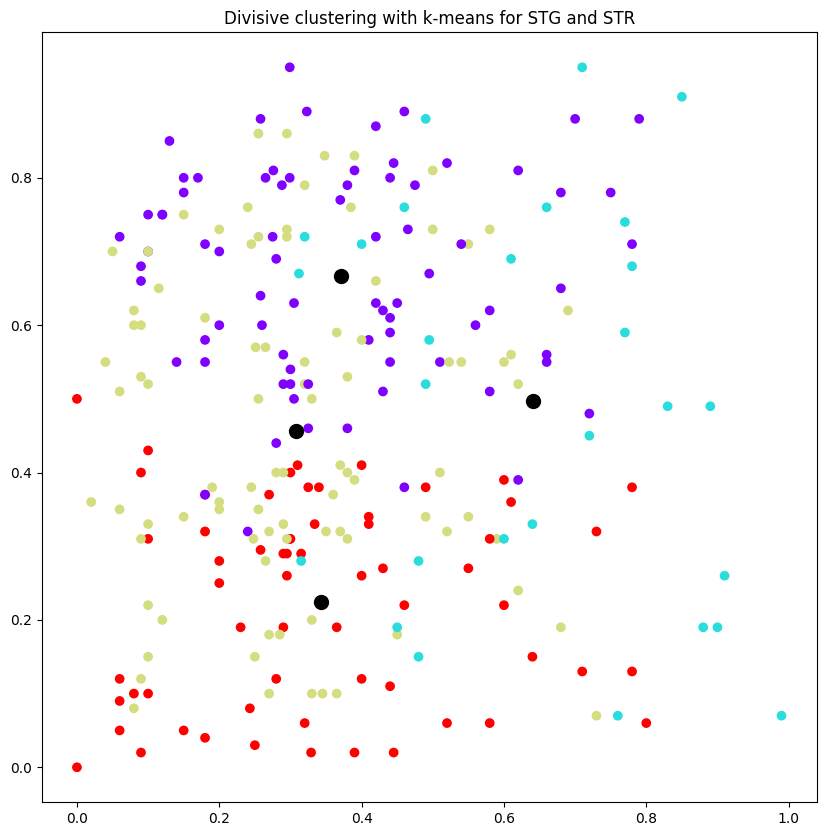

Inertia (SSE) for KMeans: 41.12331096472882
Silhouette Score for Agglomerative Clustering: 0.16618543329138577
Silhouette Score for KMeans: 0.2041377912087986
[2 0 2 1 1 0 0 2 1 0 0 2 1 0 0 0 2 2 2 2 1 0 0 2 1 0 2 2 3 0 0 1 1 0 0 2 1
 2 2 2 1 0 0 1 2 0 0 0 3 0 2 2 1 0 2 2 1 0 0 1 1 0 0 1 1 2 2 1 2 0 0 0 1 0
 0 2 1 0 0 0 1 0 0 2 1 2 0 2 1 0 0 1 2 0 0 1 1 0 0 2 2 0 0 2 1 0 0 0 1 0 0
 0 3 0 2 2 1 1 0 0 1 1 2 0 0 1 0 0 1 1 2 0 2 3 0 0 2 1 0 0 2 1 0 0 0 3 2 2
 2 3 0 2 1 1 0 0 0 3 0 0 1 1 0 0 2 0 0 3 1 0 2 0 3 1 0 0 1 3 0 0 1 1 0 2 1
 1 0 0 1 1 0 0 0 1 0 2 2 3 0 2 2 3 2 2 3 1 0 2 1 3 0 0 3 3 0 2 1 3 0 2 1 1
 0 0 1 3 0 0 3 3 0 2 1 3 0 2 1 3 0 0 1 3 0 0 1 3 0 0 3 3 0 0 1 1 0 0 1 1]


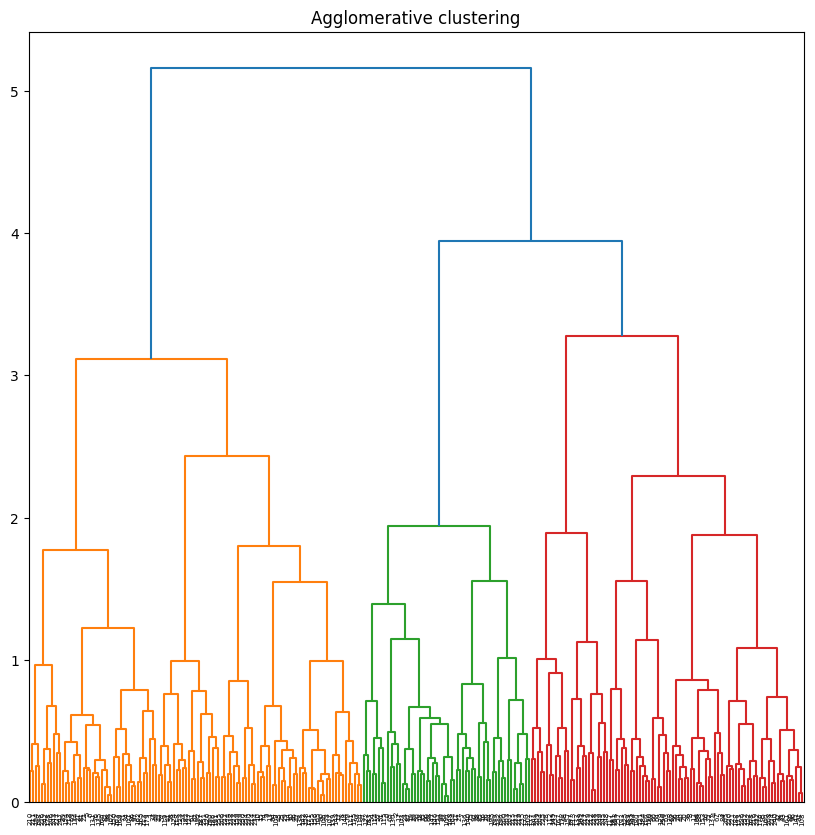

In [32]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

X = df_train[['STG','SCG','STR','LPR','PEG']]
scaler = StandardScaler()
scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4)
y_means = kmeans.fit_predict(X)
inertia = kmeans.inertia_
print(f"Inertia (SSE) for KMeans: {inertia}")
k_silhouette = silhouette_score(X, y_means)
print(f"Silhouette Score for KMeans: {k_silhouette}")

centroids = kmeans.cluster_centers_
print(centroids)
print(y_means)

# Visualize the clusters
plt.figure(figsize=(10,10))
plt.title('Divisive clustering with k-means for STG and STR')
plt.scatter(X['STG'], X['STR'], c=y_means, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,2], c='black',s=100)
plt.show()

plt.figure(figsize=(10,10))
plt.title('Agglomerative clustering')
Dendrogram = sch.dendrogram((sch.linkage(X, method='ward')))

ac = AgglomerativeClustering(n_clusters=4)
y_ac = ac.fit_predict(X)
a_silhouette = silhouette_score(X, y_ac)
print(f"Inertia (SSE) for KMeans: {inertia}")
print(f"Silhouette Score for Agglomerative Clustering: {a_silhouette}")
print(f"Silhouette Score for KMeans: {k_silhouette}")
print(y_ac)

Inertia (SSE) for KMeans: 37.26988848626865
Silhouette Score for KMeans: 0.2026976817730326


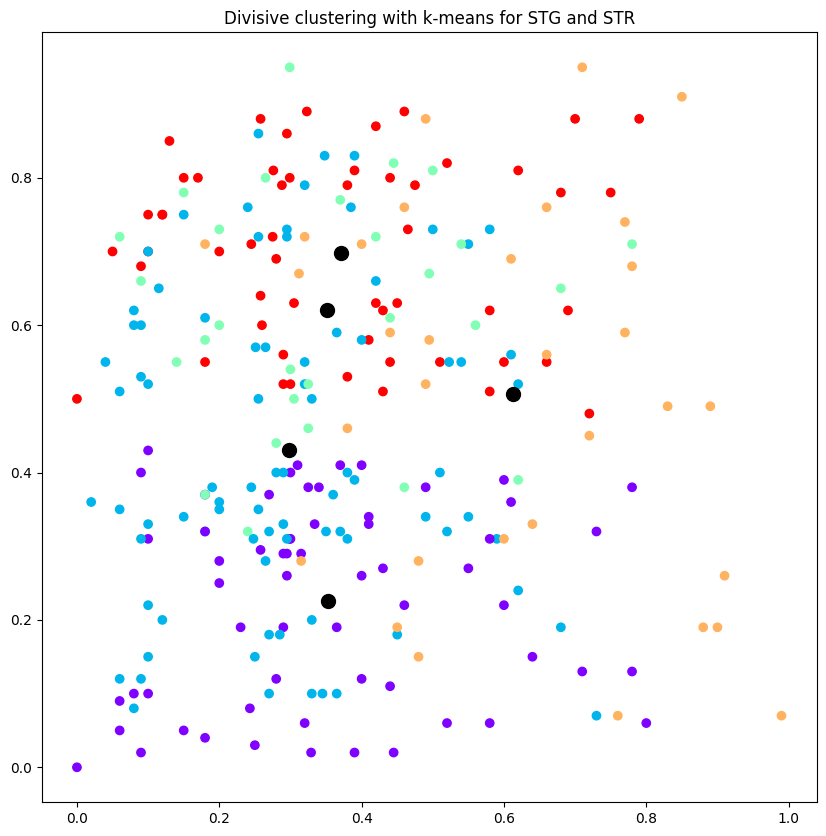

In [33]:
kmeans = KMeans(n_clusters=5)
y_means = kmeans.fit_predict(X)
inertia = kmeans.inertia_
print(f"Inertia (SSE) for KMeans: {inertia}")
k_silhouette = silhouette_score(X, y_means)
print(f"Silhouette Score for KMeans: {k_silhouette}")

centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(10,10))
plt.title('Divisive clustering with k-means for STG and STR')
plt.scatter(X['STG'], X['STR'], c=y_means, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,2], c='black',s=100)
plt.show()

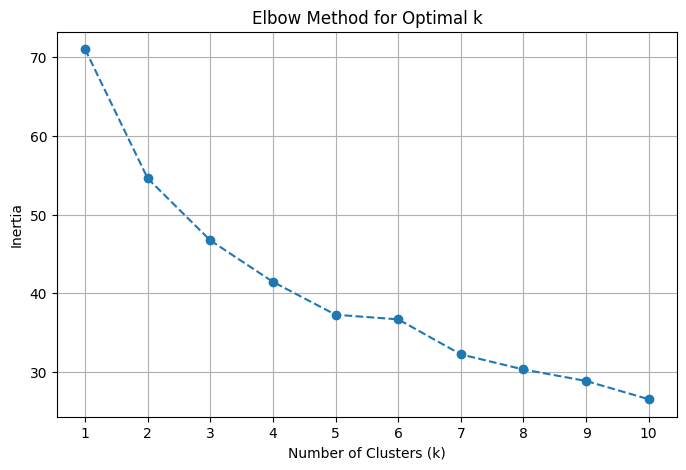

In [23]:
# Elbow Method: Calculate inertia for different numbers of clusters
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [48]:
X = df_train[['STG','SCG','STR','LPR','PEG']]
scaler = StandardScaler()
scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5)
y_means = kmeans.fit_predict(X)
inertia = kmeans.inertia_
k_silhouette = silhouette_score(X, y_means)
ac = AgglomerativeClustering(n_clusters=4)
y_ac = ac.fit_predict(X)
a_silhouette = silhouette_score(X, y_ac)
print(f"Inertia (SSE) for KMeans k=5: {inertia}")
print(f"Silhouette Score for Agglomerative Clustering: {a_silhouette}")
print(f"Silhouette Score for KMeans k=5: {k_silhouette}")

Inertia (SSE) for KMeans k=5: 38.44499831677149
Silhouette Score for Agglomerative Clustering: 0.16618543329138577
Silhouette Score for KMeans k=5: 0.17828299918731982


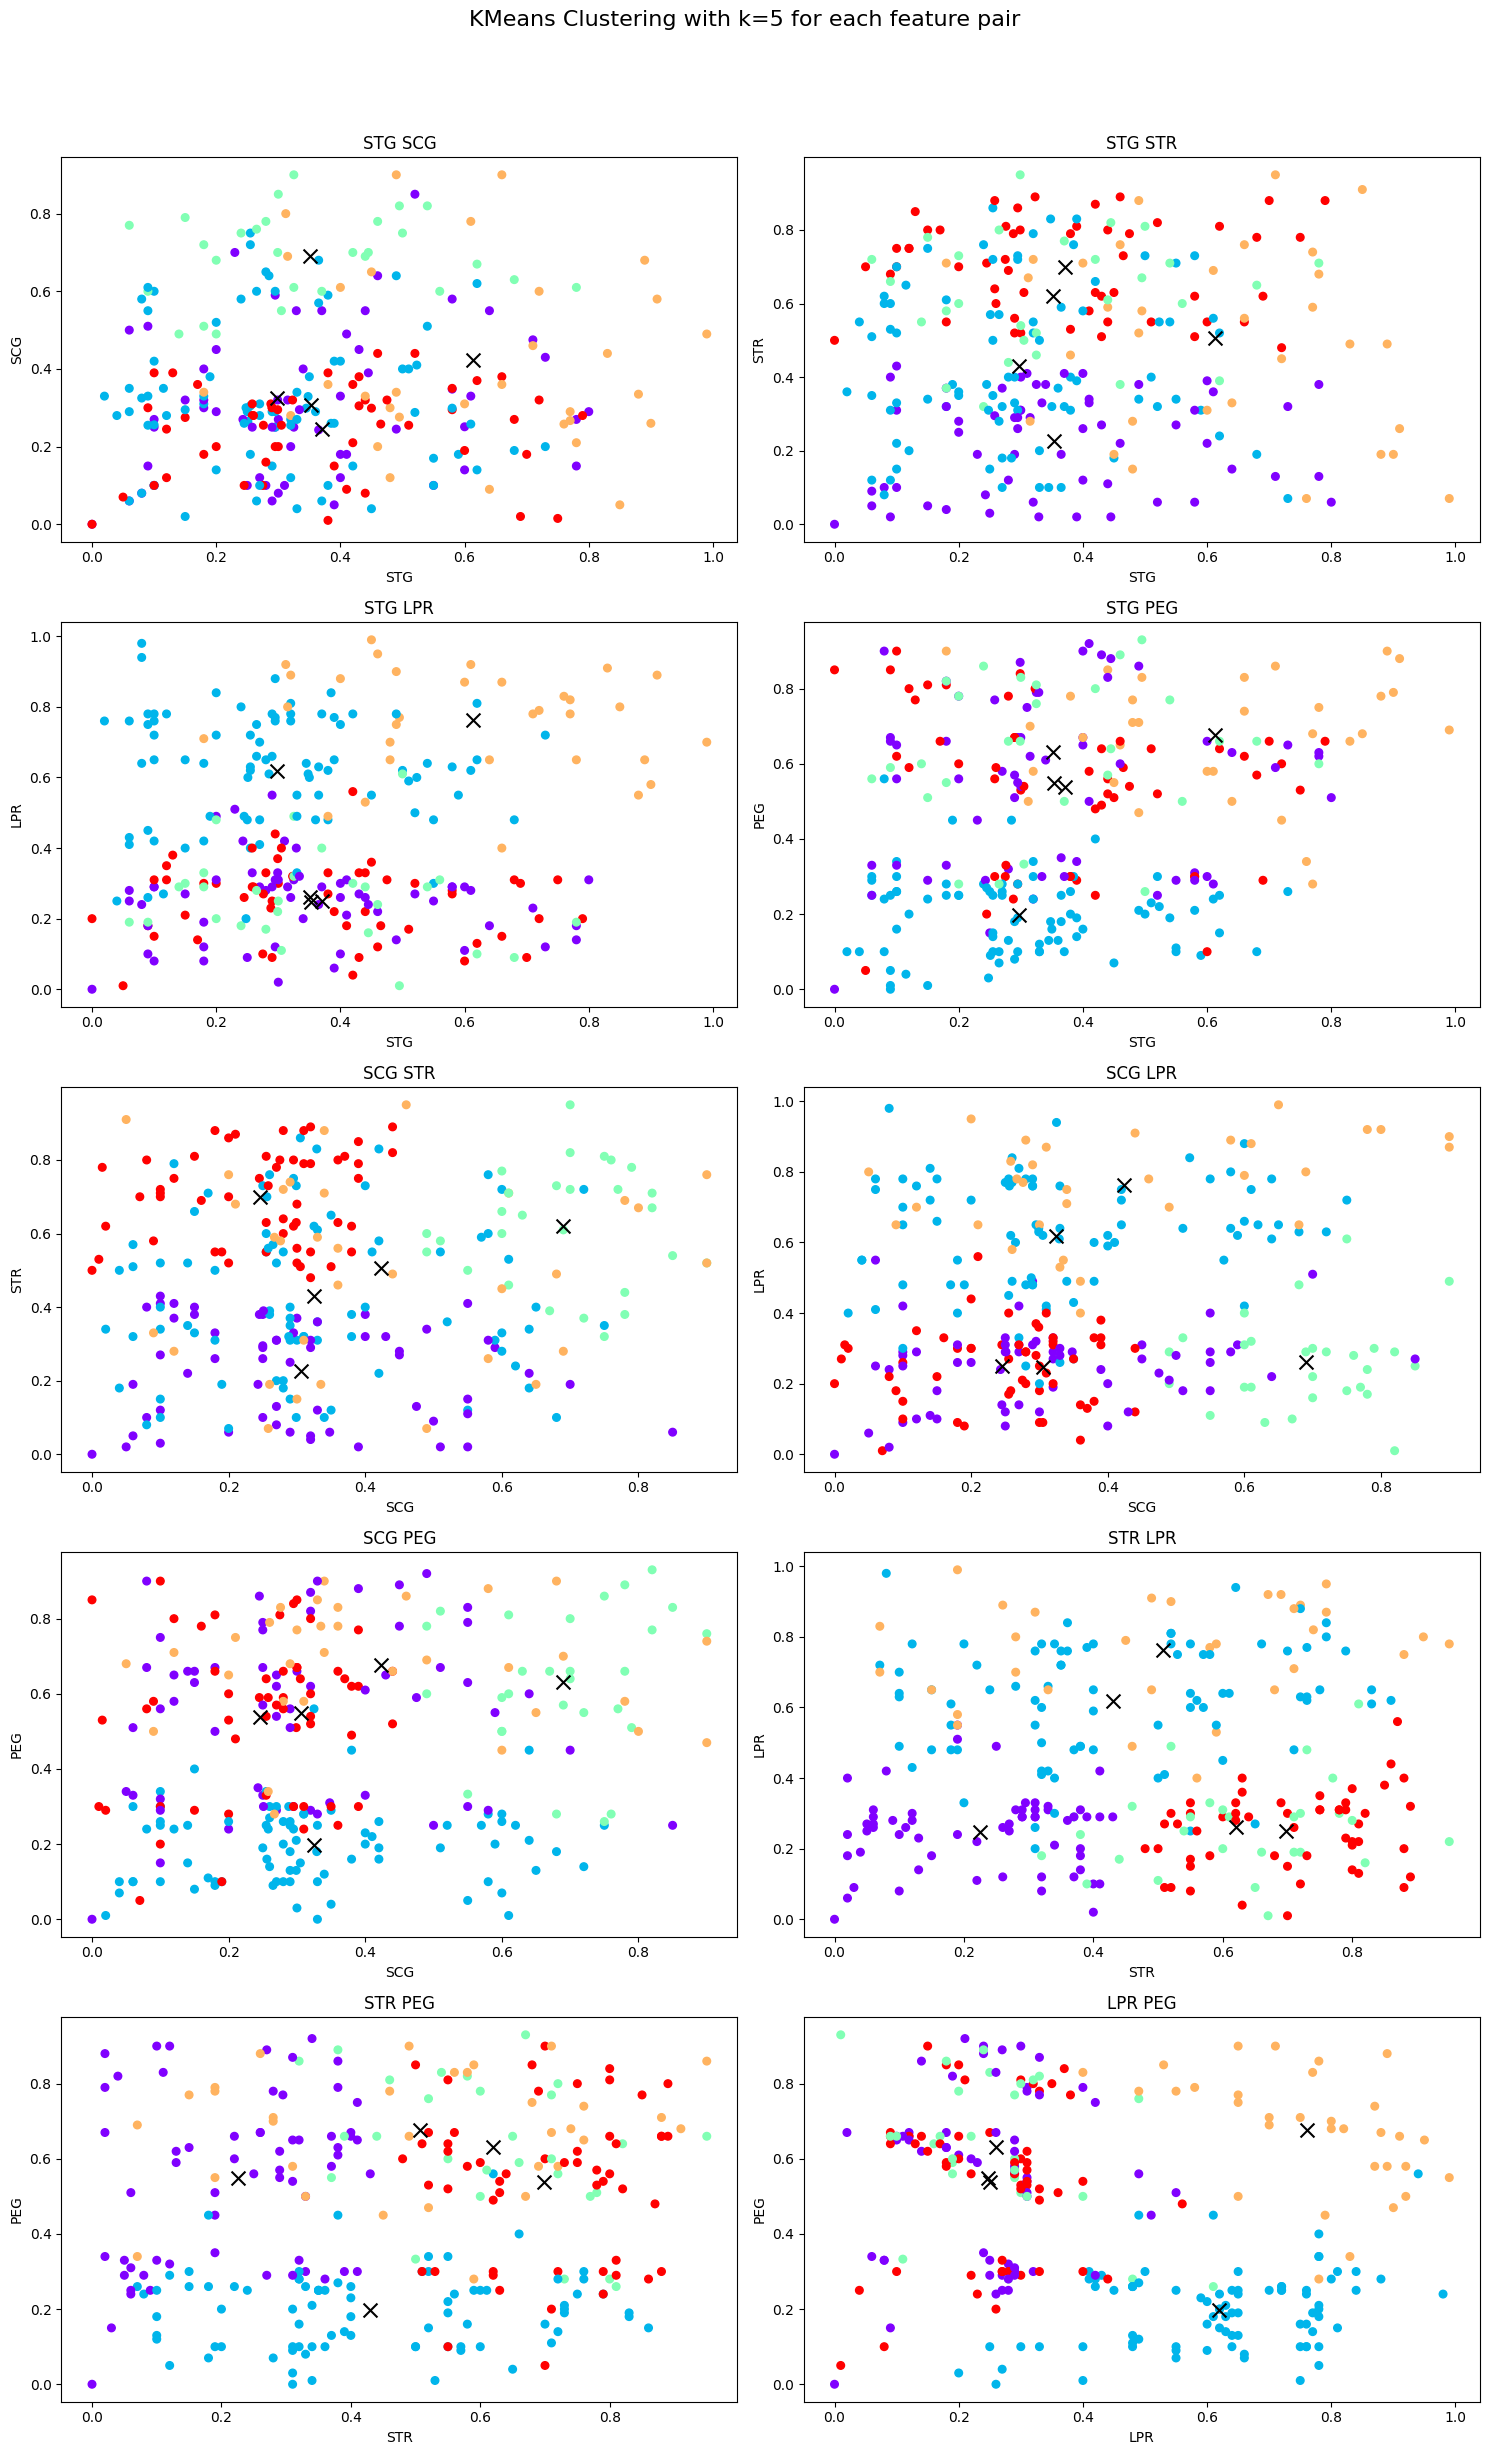

In [42]:
from itertools import combinations

# Create a 3x3 grid of scatter plots showing the interaction of the features with k=5 
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
fig.suptitle('KMeans Clustering with k=5 for each feature pair', fontsize=16)

# Generate all combinations of the features
unique_pairs = list(combinations(X.columns, 2))
for i, ax in enumerate(axes.flat):
    x_feat, y_feat = unique_pairs[i][0], unique_pairs[i][1]
    x_idx, y_idx = list(X.columns).index(x_feat), list(X.columns).index(y_feat)
    ax.scatter(X[x_feat], X[y_feat], c=y_means, cmap='rainbow', s=30)
    ax.scatter(centroids[:, x_idx], centroids[:, y_idx], c='black', s=100, marker='x')
    ax.set_title(f'{x_feat} {y_feat}')
    ax.set_xlabel(x_feat)
    ax.set_ylabel(y_feat)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## KMeans
Inertia (SSE): A value of 38.44 suggests compact clusters with low within-cluster variance.<p>
Silhouette Score: 0.178 indicates moderate cluster cohesion and separation, slightly better than Agglomerative Clustering.<p>

## Agglomerative Clustering
Silhouette Score: 0.166, which is lower than KMeans, indicating less distinct and cohesive clusters.<p>
    
    
<b>In summary, KMeans outperforms Agglomerative Clustering in terms of both cluster compactness (SSE) and separation (Silhouette Score).</b><p>
SCG STR Seems to have the biggest separation in centroid indicating that these clusters are the most distinct from each other. This suggests that the features or data points in these clusters are significantly different compared to others, making them easier to identify and analyze.